# Natural Language Processing Project
#### By: Lupe Luna, Forrest McCrosky, and Anna Vu
---

We will be using web scraping to extract some of the most-starred repositories on Github, and build a multi-classification model to predict what the most predominant programming language used will be based off of the README.md contents. 

<br>

# Agenda:
---
 - Executive Summary
 - Project Planning
 - Imports
 - Data Acquisition
 - Data Preparation
 - Exploration
 - Modeling
 - Test
 - Conclusion and Next Steps

<br>

# Executive Summary:
---
TBA

# Project Planning:
---
We're going to need to use web scraping in order to get ~200 repositories from [Github](www.github.com), once we bring in these in, we will filter for desirable README contents (language, size, etc.) We need to use the content of at least 100 READMEs, so to best ensure they will have valuable information, we are going to scrape our data from the [most starred repositories](https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories) on Github. 

After we follow the steps of the data science pipeline, we'll need to set up a couple of slides to present our findings.

<br>

# Imports:

In [1]:
#import our modules
import acquire as a
import prepare as p

#import our most-used libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import NLP neccessities
import nltk
import re
from pprint import pprint
import unicodedata
from nltk.corpus import stopwords
from wordcloud import WordCloud
from PIL import Image

#import sklearn for our models
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Acquisition: 
---

    get_repo_list() is designed to create a repo list from the most starred 
    repositories on Github.
    
    The function loops through 20 pages with 10 results per page of the most 
    starred repos on github using a range from 1 to 21.
    
    It then uses another loop to pull out all the titles of each repo using 
    the beautiful soup library and html per page. It will also remove null elements and white spaces.
    
    After get_repo list ran, we manually removed 6 repositories from the list that were poorly formatted. 
    This leaves us 198 repos.
    
    
    Since it does take a while to run and grab 200 repositiories
    (and you'll need your own Github token to have it function properly),
    we decided to create a .csv as an endproduct for our usage.

<br>

Ran acquire.py from the terminal, and brought in our .json file as a dataframe

<br>
Now we are going to filter for the top four languages. We found them to be JavaScript, Python, Java, and Go.

<br>
Create a .csv, from the steps above, to be able to bring up this data faster as we work through the project.

<br>
Let's bring in the data with NLP_df.csv

In [2]:
#bring in NLP_df.csv as a pandas dataframe
df = a.get_github_data()

#look at our dataframe
df

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...
...,...,...,...
107,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m..."
108,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w..."
109,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...
110,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...


### Acquisition Takeaways:

 - New features could be made, like character count and word count. 
 - Notice non-English characters in the contents
 - Need to clean the readme_contents
 - Duplicates were dropped while bringing in the data
 - We went from 200 to 109 rows

# Data Preparation:
---

In [3]:
#this prep function will clean our readme_contents, and create readme_length and word_count features
df = p.prep_github_data(df, 'readme_contents')

In [4]:
#check the results of the prep function
df.head()

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15352,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,15072,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9882,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,82956,8170


In [5]:
#checking target variables distribution
df.language.value_counts()

JavaScript    55
Python        24
Java          15
Go            13
Name: language, dtype: int64

In [6]:
#split our data into train, validate, and test sets
train, validate, test = p.split(df)

In [7]:
#assure the shapes are reasonable
train.shape, validate.shape, test.shape

((59, 9), (26, 9), (22, 9))

In [8]:
#checking the balance of our train target variables
train.language.value_counts()

JavaScript    31
Python        13
Java           8
Go             7
Name: language, dtype: int64

### Preparation Takeaways: 
 - We have a clean set of readme_contents that we can explore on
 - Any READMEs with less than 10 words were dropped
 - Proceed to explore on our train set
 - We need to categorize content based on its dominant programming language, so we can find what words can help our model decifer what language is being used the most

# Data Exploration
---

In [9]:
import anna_explore as e

In [10]:
#content and its words put under the repository's primary language
javascript_words = ' '.join(train[train.language == 'JavaScript'].clean)
python_words = ' '.join(train[train.language == 'Python'].clean)
java_words = ' '.join(train[train.language == 'Java'].clean)
go_words = ' '.join(train[train.language == 'Go'].clean)
all_words = ' '.join(train.clean)

In [11]:
#split up content into indivdual words, and count how many times the word comes up over all readmes
javascript_freq = pd.Series(javascript_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [12]:
#create a df of frequencies of each word by language 
word_counts = pd.concat([javascript_freq, python_freq, java_freq, go_freq, all_freq], axis=1).fillna(0).astype(int)

#name the columns
word_counts.columns = ['javascript', 'python','java','go','all']

#check our most frequently occuring words
word_counts.sort_values('all', ascending=False).head(10)

,javascript,python,java,go,all
source,928,56,7,16,1007
javascript,782,41,0,0,823
python,162,547,0,0,709
data,154,320,7,1,482
use,226,189,16,16,447
learning,33,410,1,0,444
icon,430,0,0,0,430
library,39,374,5,1,419
freewarefreeware,395,0,0,0,395
1,215,135,37,2,389


In [13]:
# Sorting By Java and JavaScript both in descending order to look for overlap
word_counts.sort_values(['java', 'javascript'], ascending=[False, False]).head(8)

,javascript,python,java,go,all
td,107,0,174,0,281
aligncentera,1,0,172,0,173
width100px,0,0,172,0,172
altbr,0,0,172,0,172
titlecodeatd,0,0,127,0,127
tr,27,2,88,0,117
java,66,24,41,0,131
1,215,135,37,2,389


In [14]:
# Sorting By Python and Go
word_counts.sort_values(['python', 'go'], ascending=[False, False]).head(8)

,javascript,python,java,go,all
python,162,547,0,0,709
learning,33,410,1,0,444
library,39,374,5,1,419
machine,17,339,0,1,357
data,154,320,7,1,482
http,38,232,2,1,273
use,226,189,16,16,447
video,31,169,0,0,200


In [15]:
# Sorting By Python and Java
word_counts.sort_values(['python', 'java'], ascending=[False, False]).head(8)

,javascript,python,java,go,all
python,162,547,0,0,709
learning,33,410,1,0,444
library,39,374,5,1,419
machine,17,339,0,1,357
data,154,320,7,1,482
http,38,232,2,1,273
use,226,189,16,16,447
video,31,169,0,0,200


In [16]:
word_counts

,javascript,python,java,go,all
source,928,56,7,16,1007
javascript,782,41,0,0,823
icon,430,0,0,0,430
freewarefreeware,395,0,0,0,395
const,388,0,0,0,388
...,...,...,...,...,...
acknowledgments,0,0,0,1,1
puid1000,0,0,0,1,1
quayhttpsquayiorepositoryprometheusprometheusstatusquay,0,0,0,1,1
githubcomgolanggroupcachev000202001210451368c9f03a8e57e,0,0,0,1,1


Let's compare programming languages and how much they use any of the overall top 20 words across all READMEs

#### Most Frequent Words 

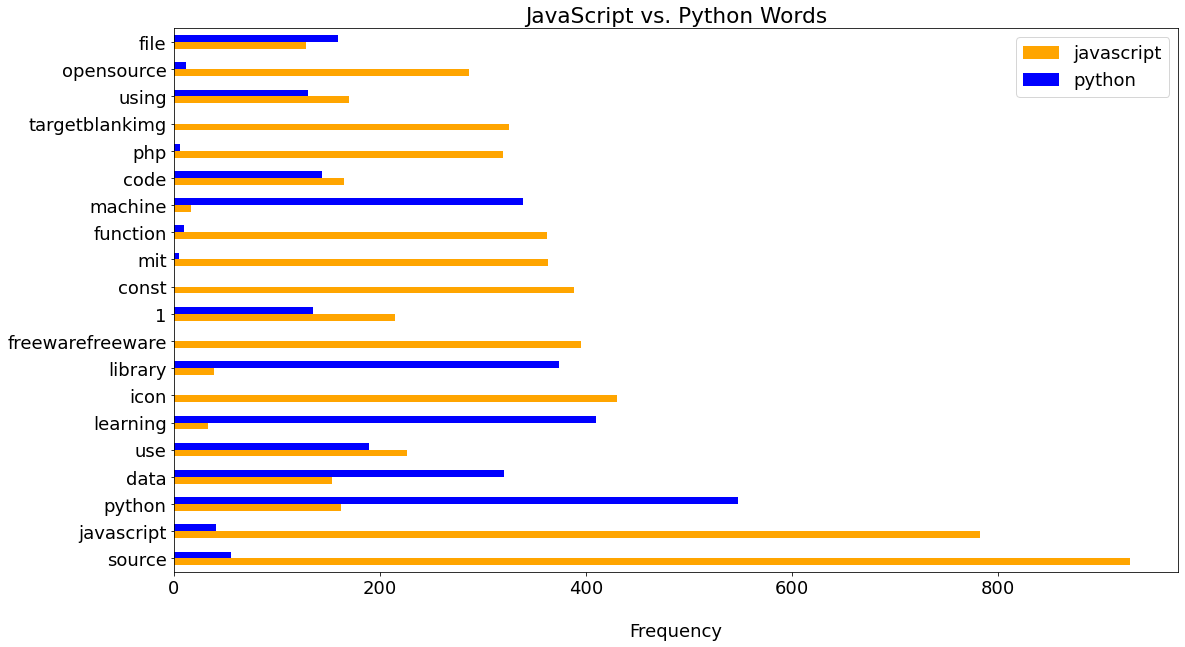

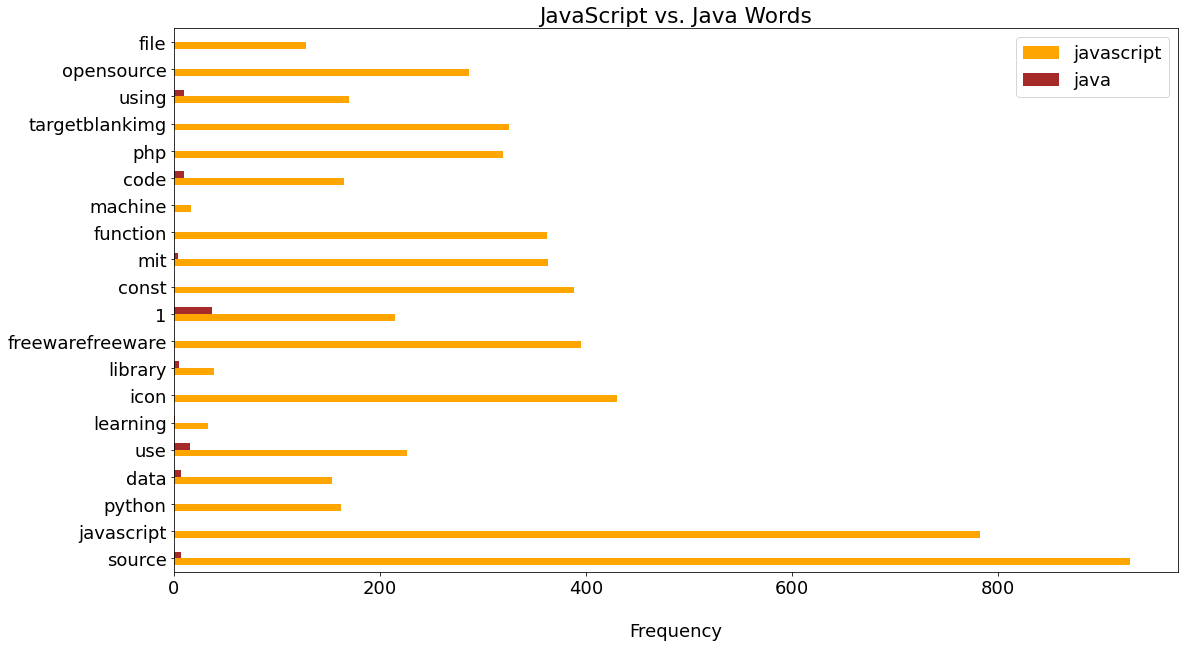

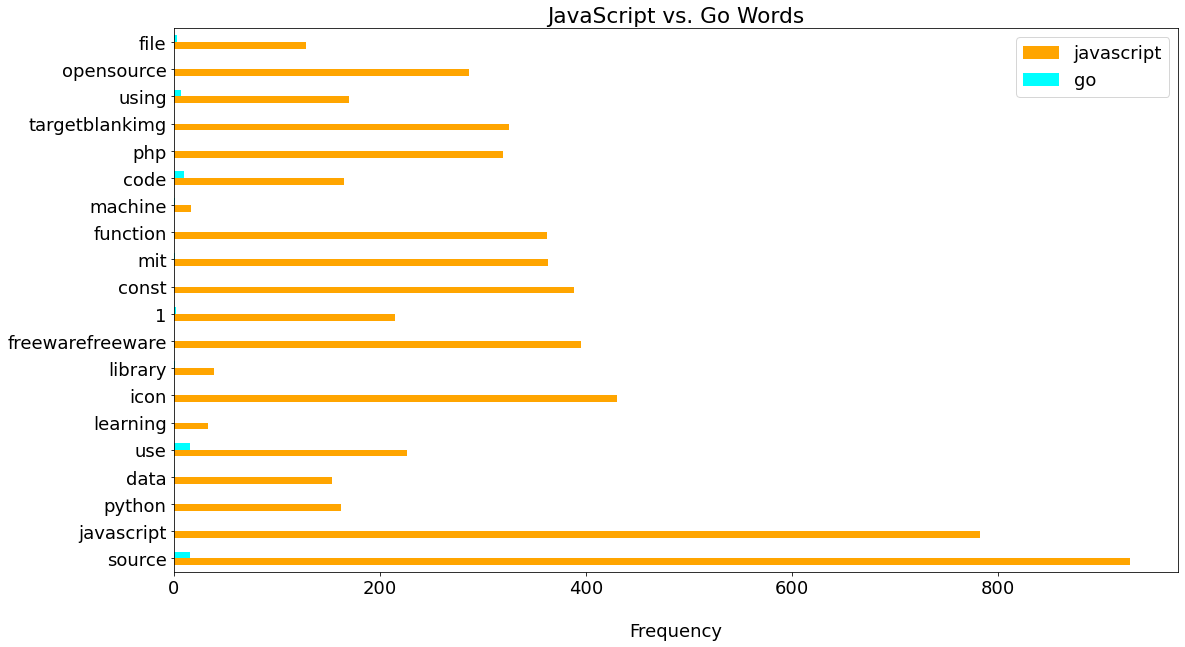

In [17]:
e.javascript_barh(word_counts)

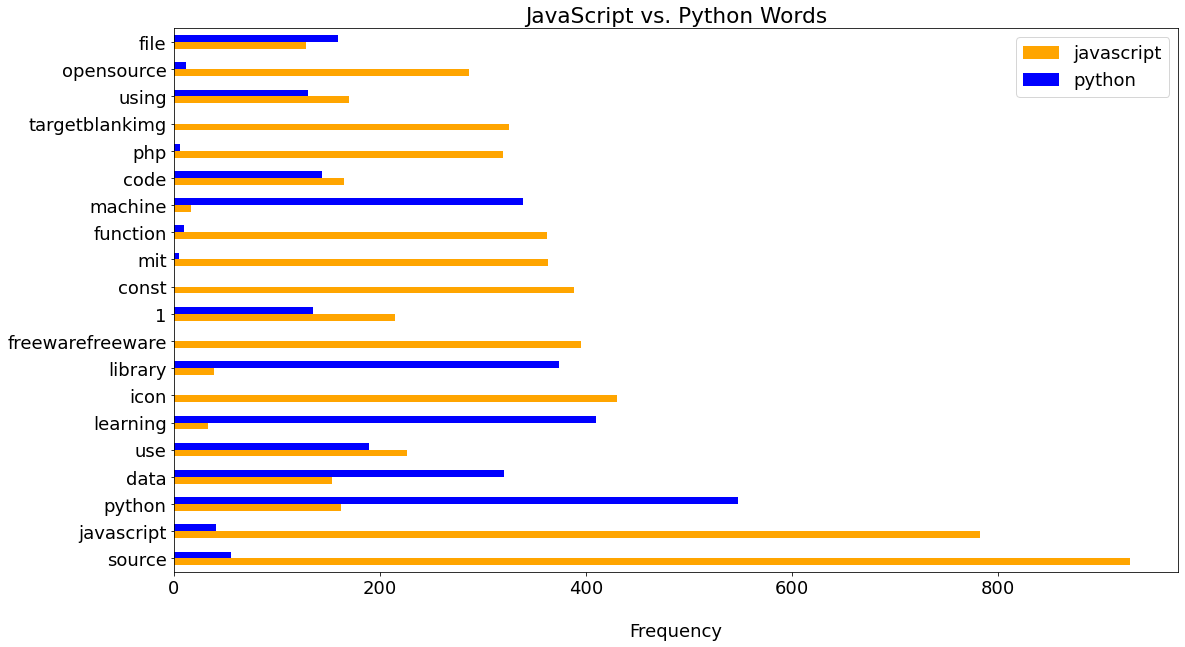

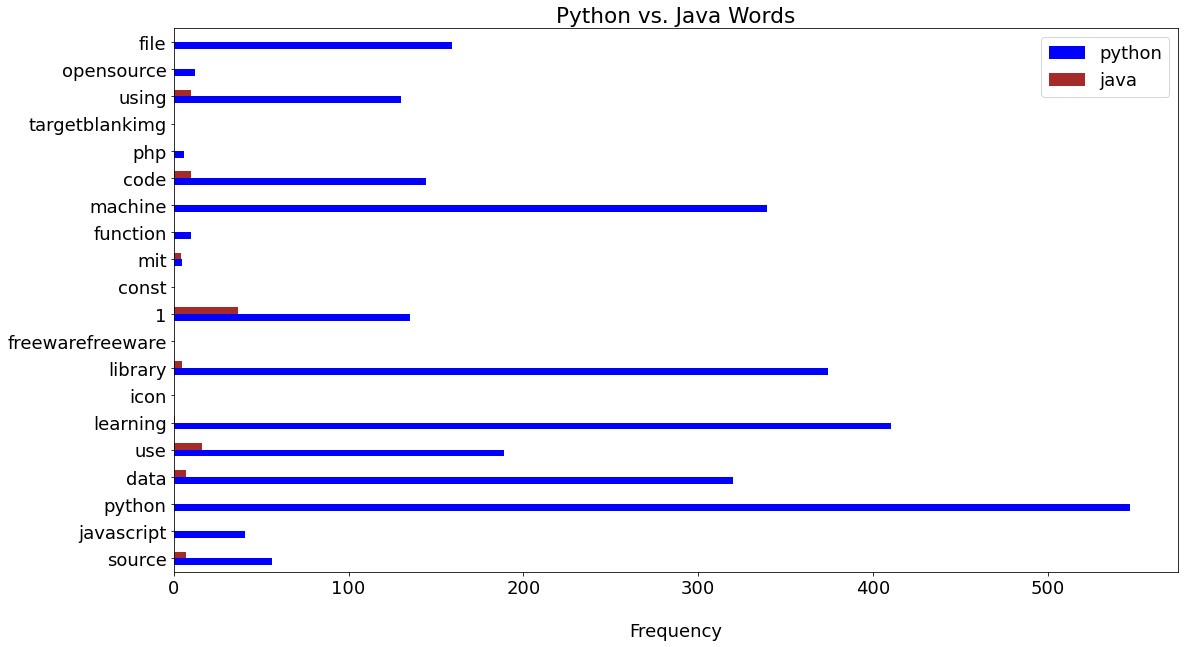

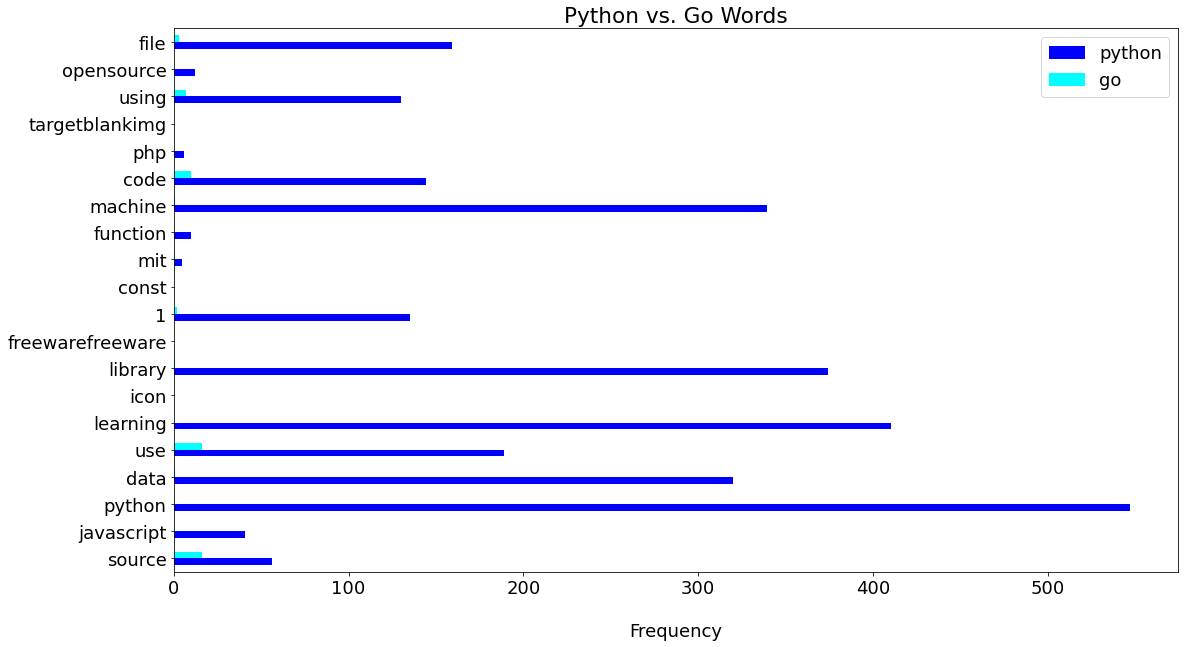

In [18]:
e.python_barh(word_counts)

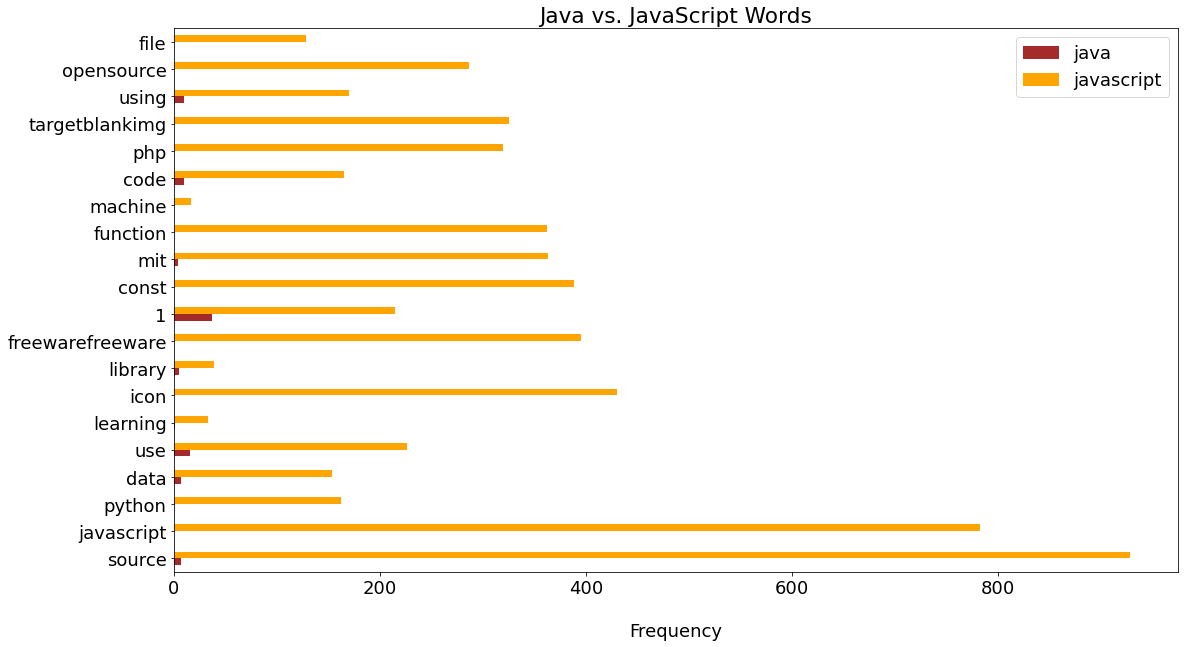

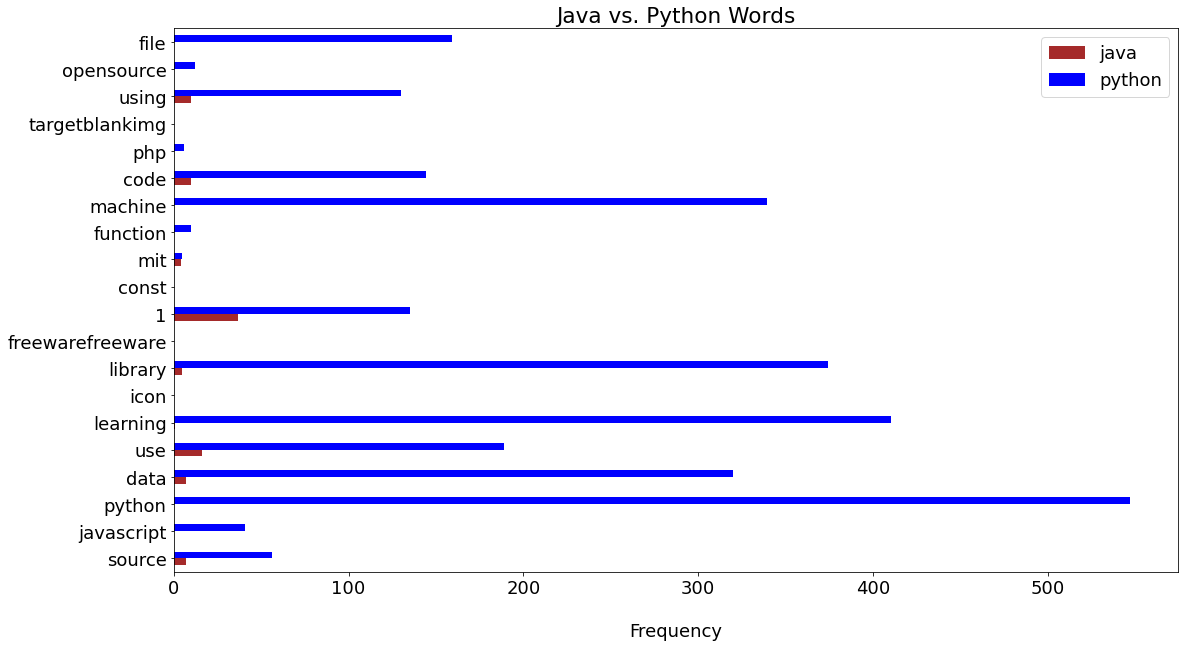

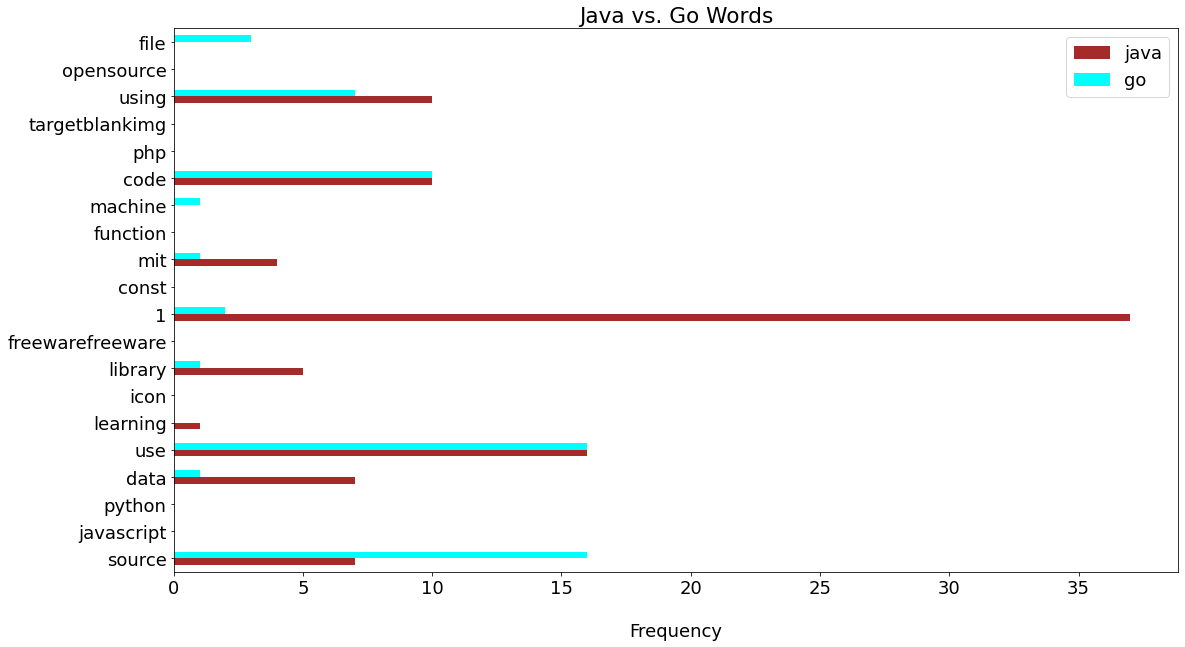

In [19]:
e.java_barh(word_counts)

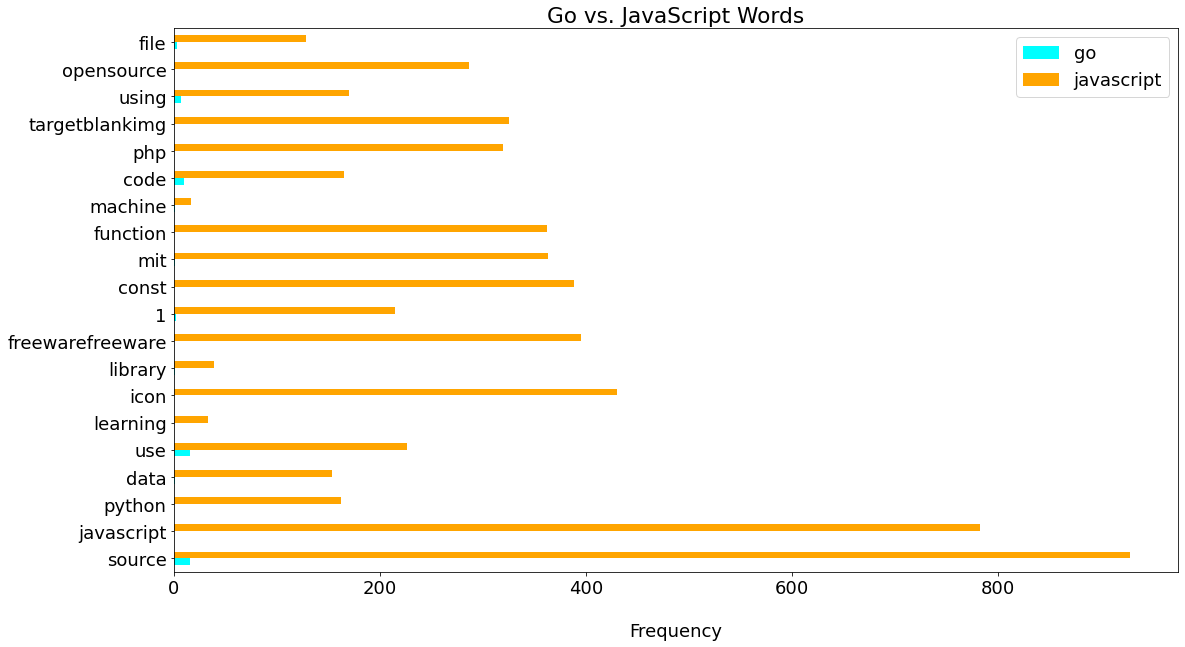

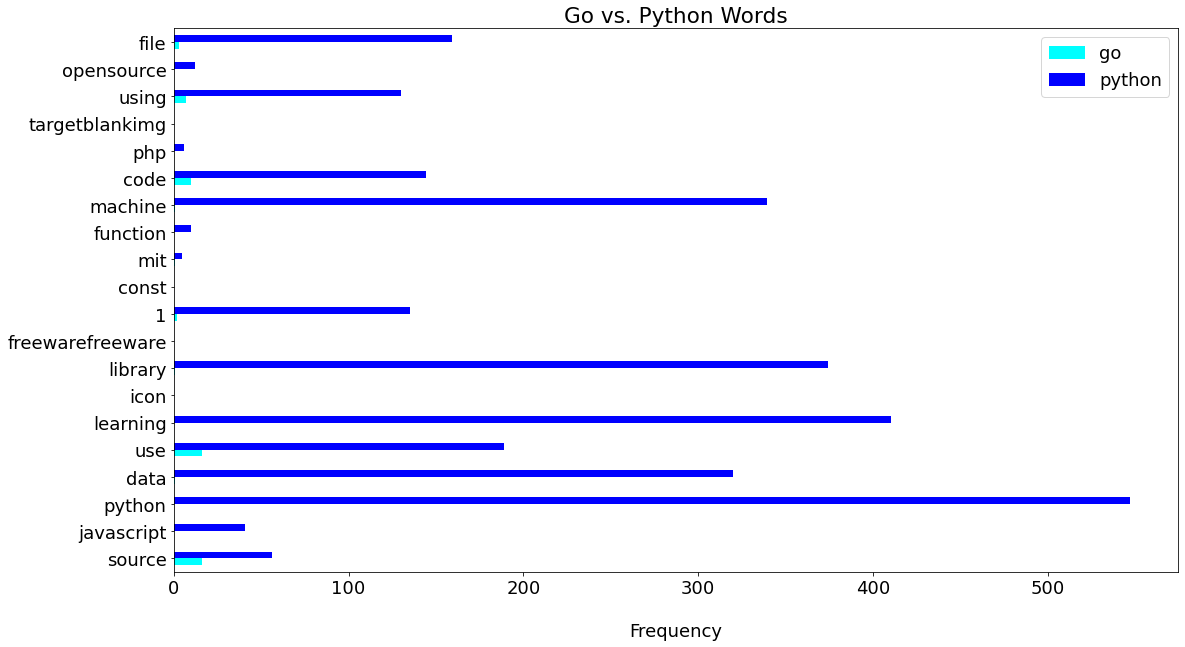

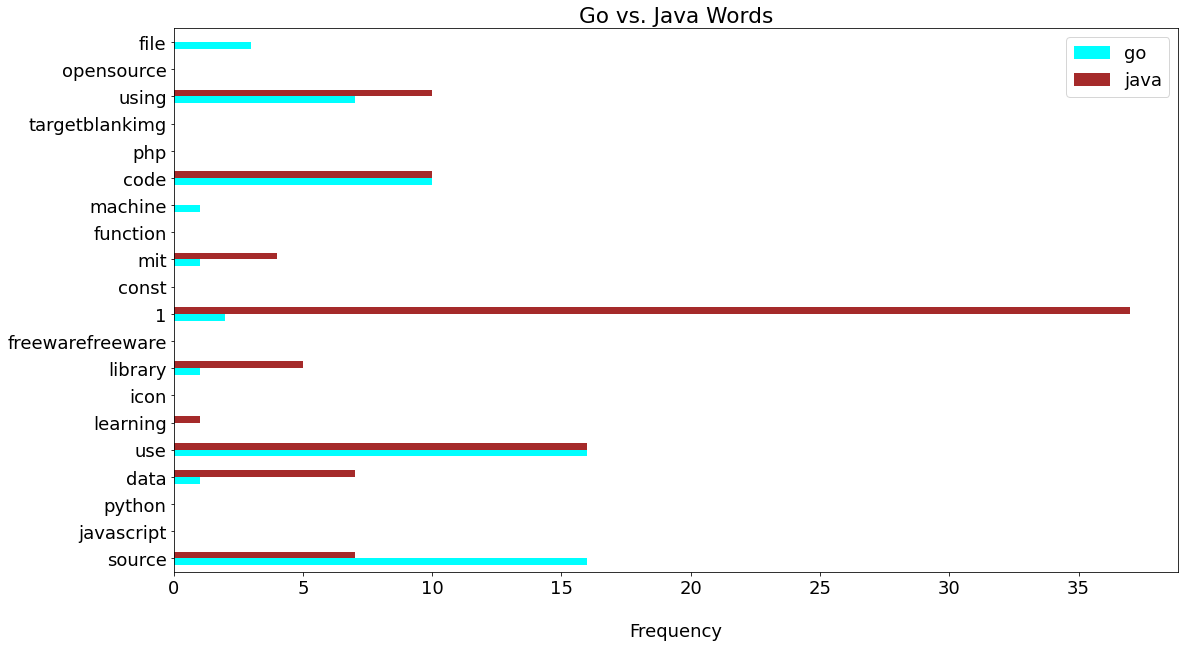

In [20]:
e.go_barh(word_counts)

#### Word Overlap Per Language

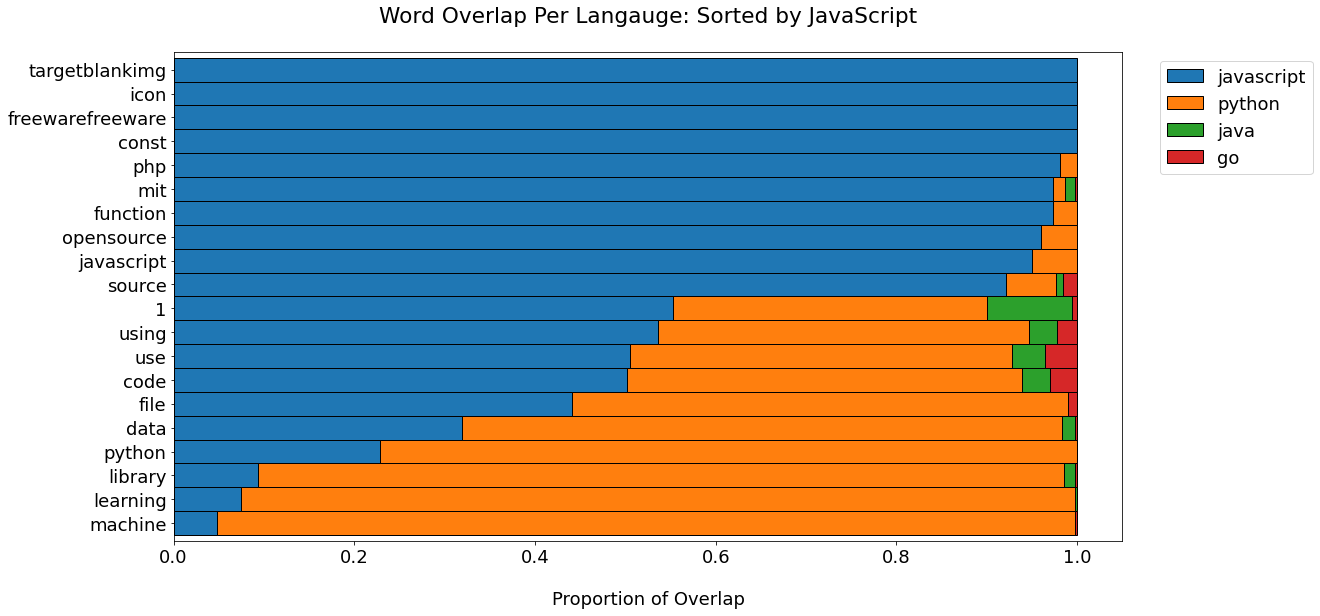

In [21]:
plt.rc('font', size=18)
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='javascript')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(17,9)))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Word Overlap Per Langauge: Sorted by JavaScript\n')
plt.xlabel('\nProportion of Overlap')
plt.show()

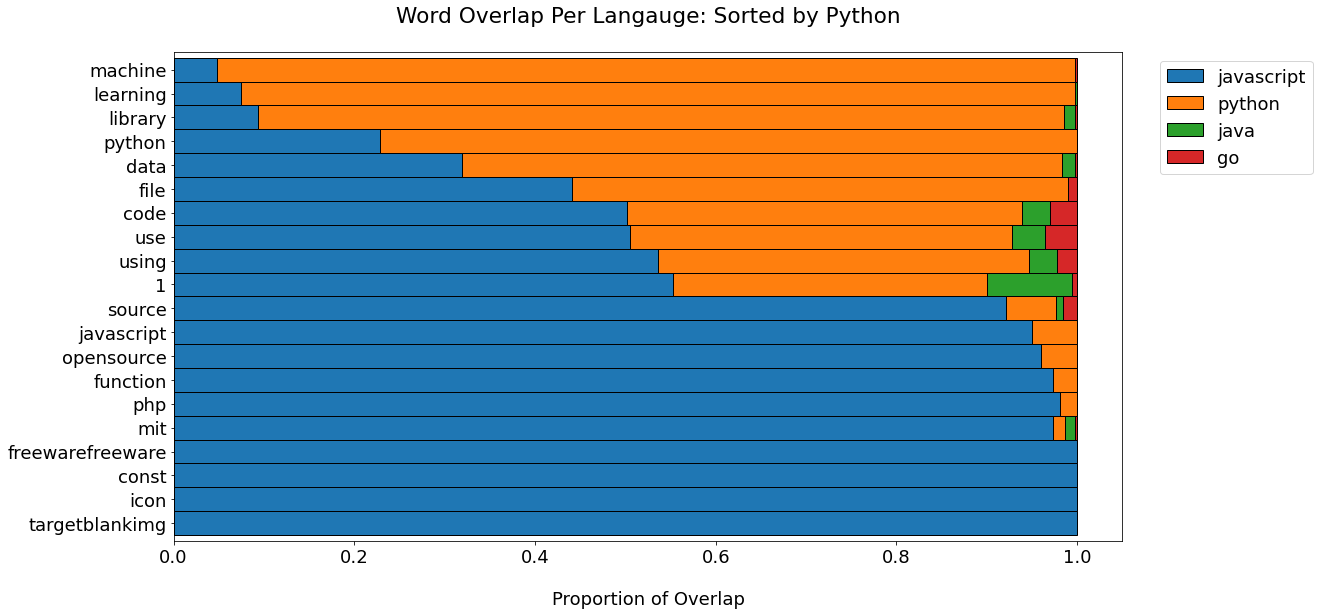

In [22]:
## proportion stacked bar charts sorted by Python

plt.rc('font', size=18)
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='python')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(17,9)))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Word Overlap Per Langauge: Sorted by Python\n')
plt.xlabel('\nProportion of Overlap')
plt.show()

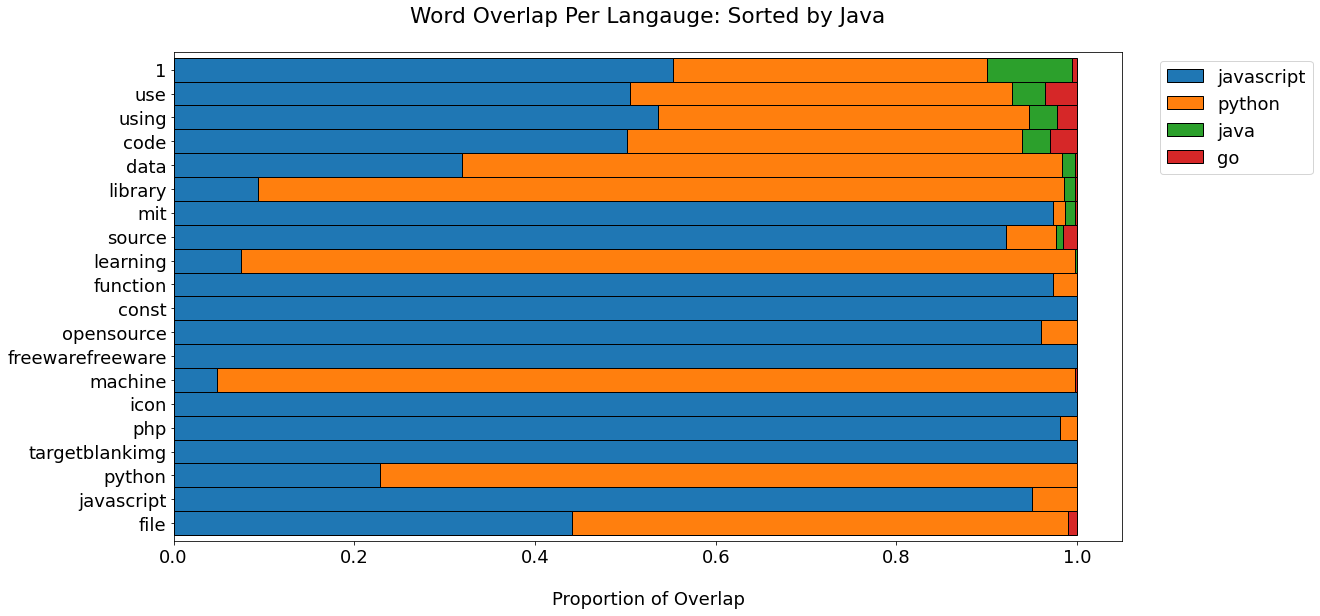

In [23]:
plt.rc('font', size=18)
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='java')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(17,9)))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Word Overlap Per Langauge: Sorted by Java\n')
plt.xlabel('\nProportion of Overlap')
plt.show()

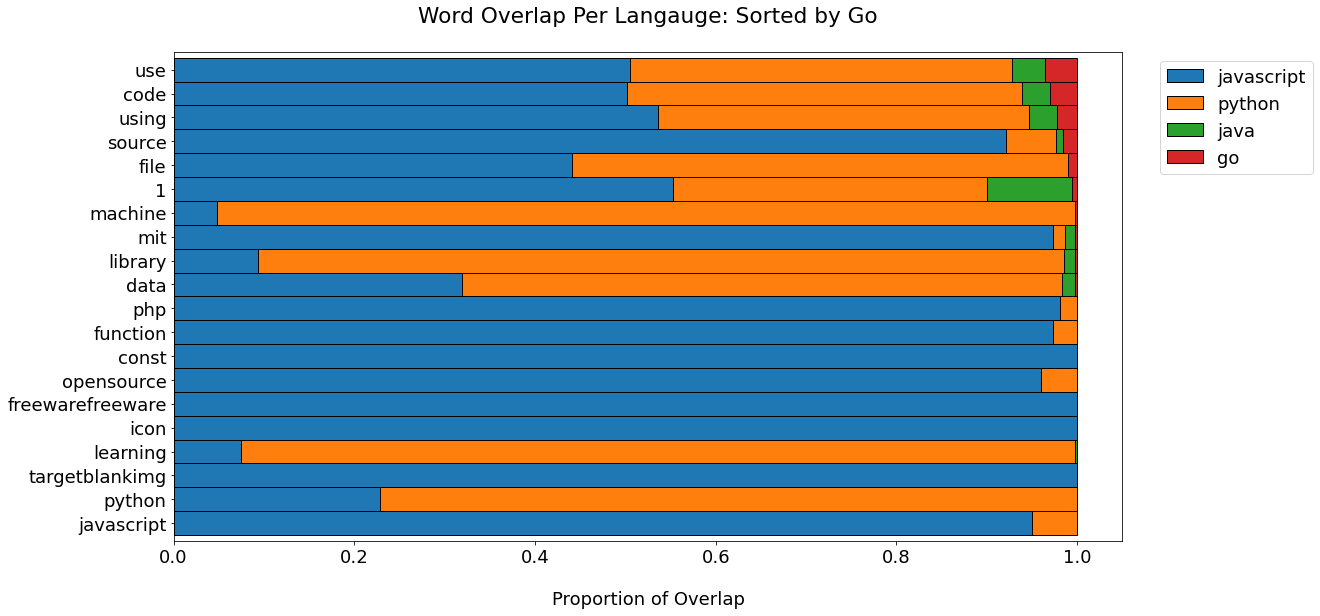

In [24]:
plt.rc('font', size=18)
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='go')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(17,9)))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Word Overlap Per Langauge: Sorted by Go\n')
plt.xlabel('\nProportion of Overlap')
plt.show()

#### Single Word Wordclouds

In [25]:
language_words = [javascript_words,python_words,java_words,go_words]

JavaScript, Python, Java, and Go Wordclouds (single words)


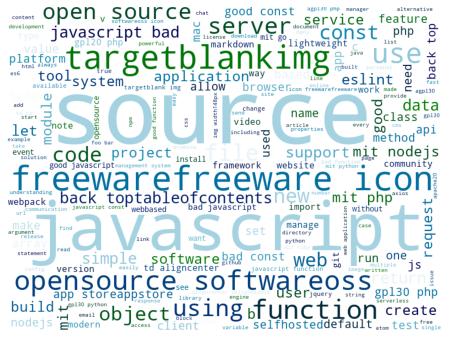

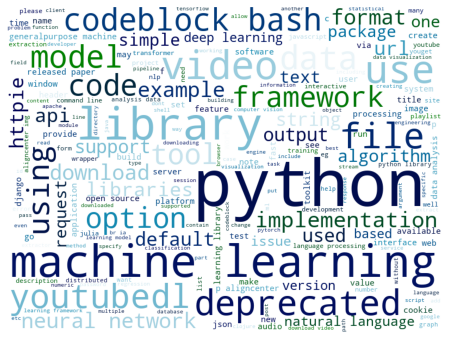

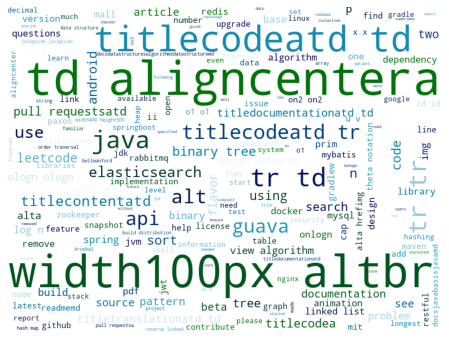

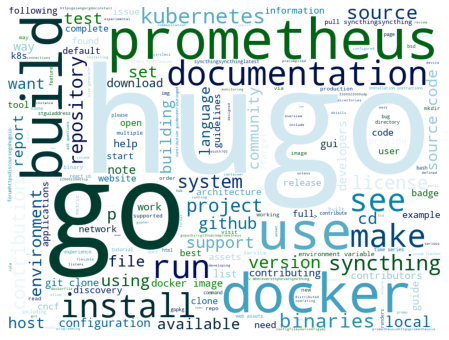

In [26]:
e.simple_wordclouds(language_words)

### Bigrams and Trigrams per Category

#### Bigrams Per Language

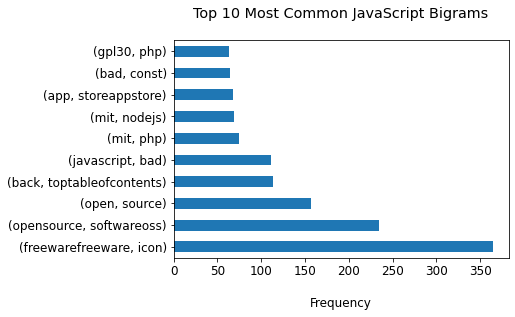

In [27]:
plt.rc('font', size=12)
pd.Series(nltk.bigrams(javascript_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 Most Common JavaScript Bigrams\n')
plt.xlabel('\nFrequency')
None

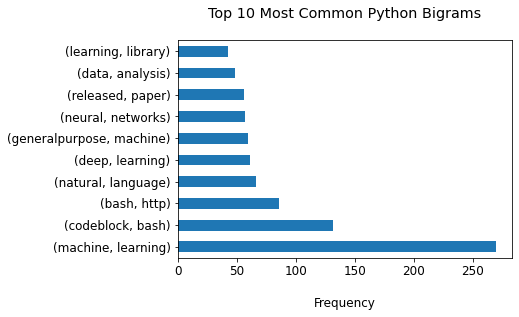

In [28]:
pd.Series(nltk.bigrams(python_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 Most Common Python Bigrams\n')
plt.xlabel('\nFrequency')
None

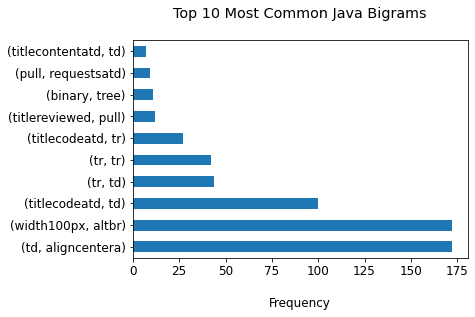

In [29]:
pd.Series(nltk.bigrams(java_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 Most Common Java Bigrams\n')
plt.xlabel('\nFrequency')
None

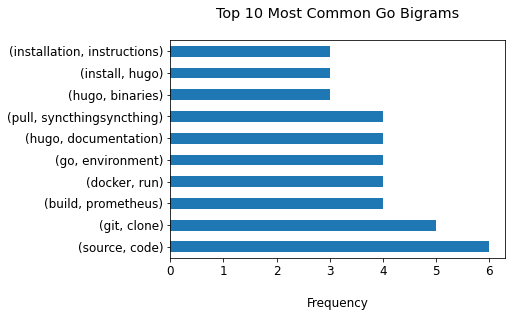

In [30]:
pd.Series(nltk.bigrams(go_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 Most Common Go Bigrams\n')
plt.xlabel('\nFrequency')
None

#### All Languages Bigram

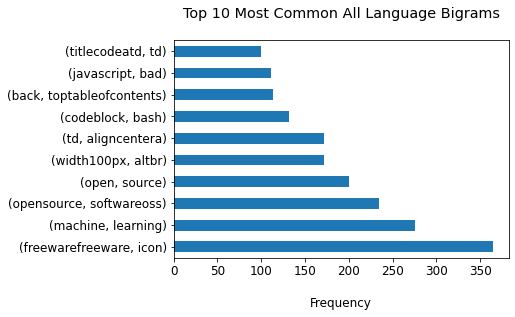

In [31]:
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 Most Common All Language Bigrams\n')
plt.xlabel('\nFrequency')
None

#### Trigrams Per Category

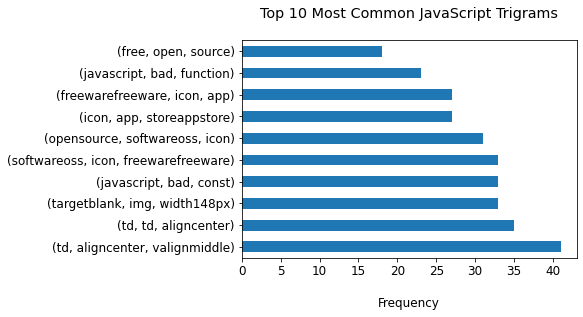

In [32]:
pd.Series(nltk.trigrams(javascript_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 Most Common JavaScript Trigrams\n')
plt.xlabel('\nFrequency')
None

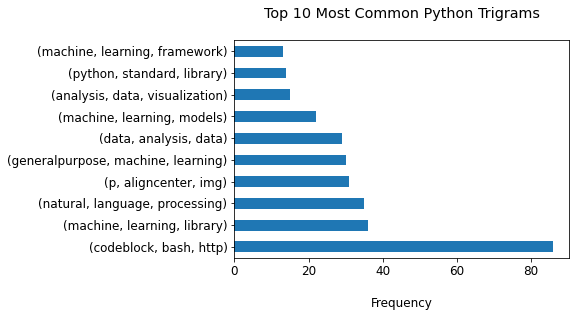

In [33]:
pd.Series(nltk.trigrams(python_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 Most Common Python Trigrams\n')
plt.xlabel('\nFrequency')
None

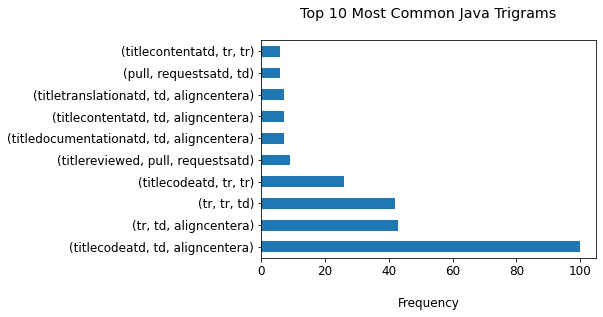

In [34]:
pd.Series(nltk.trigrams(java_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 Most Common Java Trigrams\n')
plt.xlabel('\nFrequency')
None

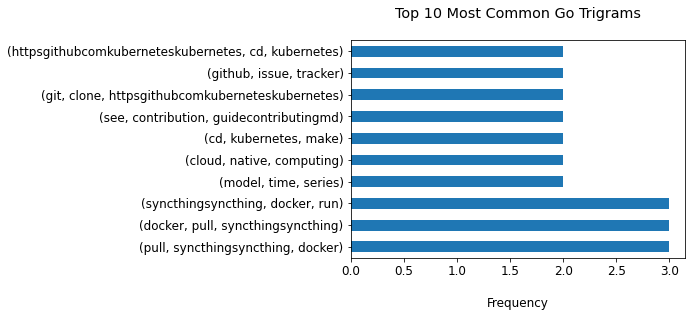

In [35]:
pd.Series(nltk.trigrams(go_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 Most Common Go Trigrams\n')
plt.xlabel('\nFrequency')
None


#### All Languages Trigram

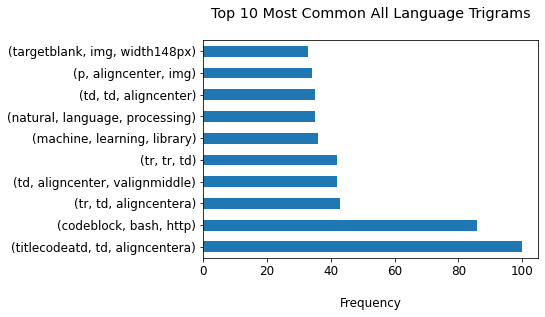

In [36]:
pd.Series(nltk.trigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 Most Common All Language Trigrams\n')
plt.xlabel('\nFrequency')
None

#### Bigram Wordclouds

In [37]:
## creating a series for the frequencies of the top 20 bigrams of all programming categories

top_20_javascript_bigrams = pd.Series(nltk.bigrams(javascript_words.split()))\
.value_counts().head(20)

top_20_python_bigrams = pd.Series(nltk.bigrams(python_words.split()))\
.value_counts().head(20)

top_20_java_bigrams = pd.Series(nltk.bigrams(java_words.split()))\
.value_counts().head(20)

top_20_go_bigrams = pd.Series(nltk.bigrams(go_words.split()))\
.value_counts().head(20)


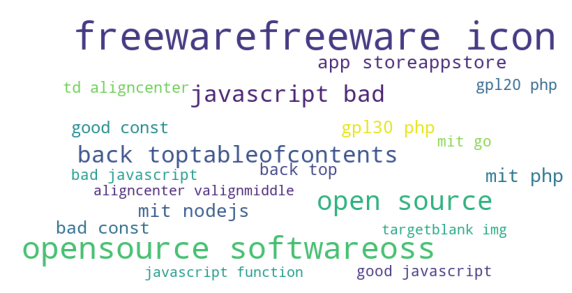

In [38]:
## using list comprehension to creat a dictionary of javascript bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_javascript_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

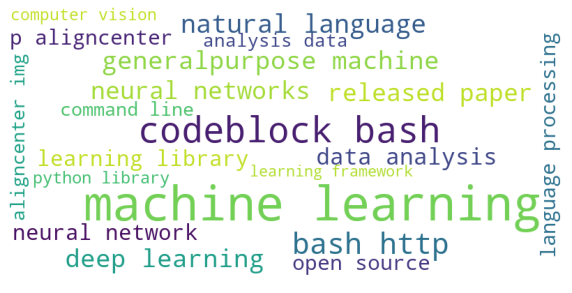

In [39]:
## using list comprehension to creat a dictionary of python bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_python_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

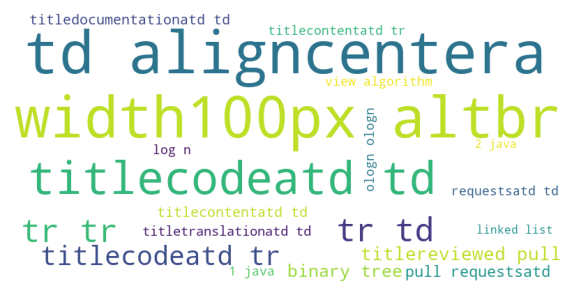

In [40]:
## using list comprehension to creat a dictionary of java bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_java_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

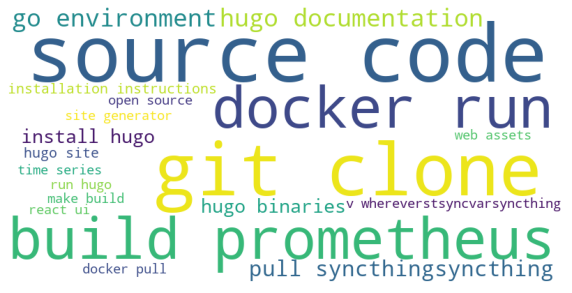

In [41]:
## using list comprehension to creat a dictionary of go bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_go_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Trigram Wordclouds

In [42]:
top_20_javascript_trigrams = pd.Series(nltk.ngrams(javascript_words.split(),3))\
.value_counts().head(20)

top_20_python_trigrams = pd.Series(nltk.ngrams(python_words.split(),3))\
.value_counts().head(20)

top_20_java_trigrams = pd.Series(nltk.ngrams(java_words.split(),3))\
.value_counts().head(20)

top_20_go_trigrams = pd.Series(nltk.ngrams(go_words.split(),3))\
.value_counts().head(20)

Top Trigrams for JavaScript


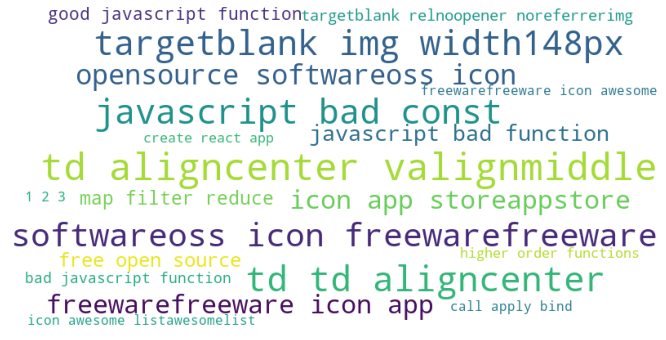

In [43]:
print('Top Trigrams for JavaScript')
data = {k[0] + ' ' + k[1] + ' ' +k[2]: v for k, v in top_20_javascript_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Trigrams for Python


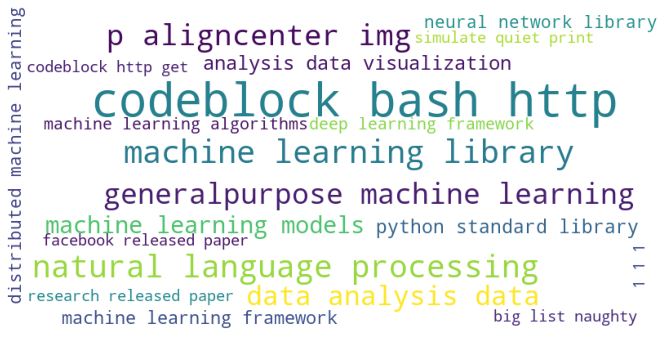

In [44]:
print('Top Trigrams for Python')
data = {k[0] + ' ' + k[1] + ' ' +k[2]: v for k, v in top_20_python_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Trigrams for Java


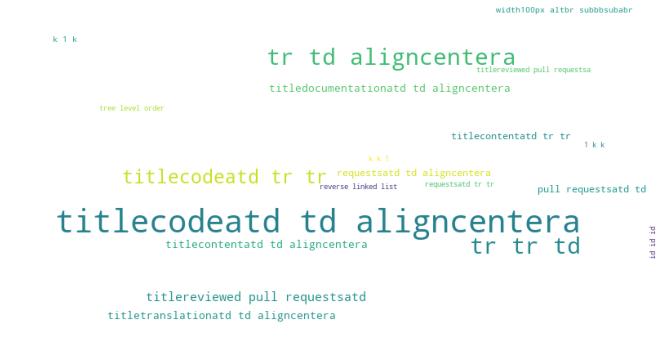

In [45]:
print('Top Trigrams for Java')
data = {k[0] + ' ' + k[1] + ' ' +k[2]: v for k, v in top_20_java_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Top Trigrams for Go


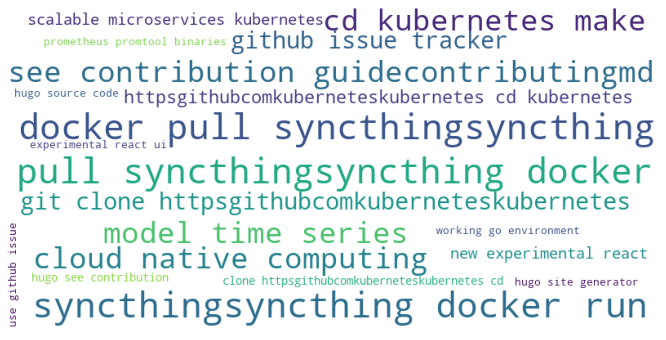

In [46]:
print('Top Trigrams for Go')
data = {k[0] + ' ' + k[1] + ' ' +k[2]: v for k, v in top_20_go_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

# Modeling
---

In [47]:
#intialize TfidfVectorizer, use single words, bigrams and trigrams
tfidf = TfidfVectorizer(ngram_range=(1,3))
X = tfidf.fit_transform(df.clean)
y = df.language

#insert X_validate, and y_validate
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size=.2, random_state=12, stratify = y)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size=.2, random_state=12, stratify= y_train_validate)

In [49]:
#use most common programming language as baseline
y_train.value_counts()

JavaScript    35
Python        15
Java          10
Go             8
Name: language, dtype: int64

In [52]:
#establish the baseline
train['baseline_prediction'] = 'JavaScript'
baseline_score = round(accuracy_score(train.language, train.baseline_prediction),2)
print(f'Our baseline score is {baseline_score}')

Our baseline score is 0.53


### Decision Tree

In [53]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

tree.score(X_train, y_train)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))


train['predicted'] = tree.predict(X_train)
test['predicted'] = tree.predict(X_test)

print(f'train score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

train score: 79.41%
validate score: 70.59%


In [54]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 79.41%
---
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
Java         0     6           0       0
JavaScript   8     3          35       2
Python       0     1           0      13
---
              precision    recall  f1-score   support

          Go       0.00      0.00      0.00         8
        Java       1.00      0.60      0.75        10
  JavaScript       0.73      1.00      0.84        35
      Python       0.93      0.87      0.90        15

    accuracy                           0.79        68
   macro avg       0.66      0.62      0.62        68
weighted avg       0.73      0.79      0.74        68



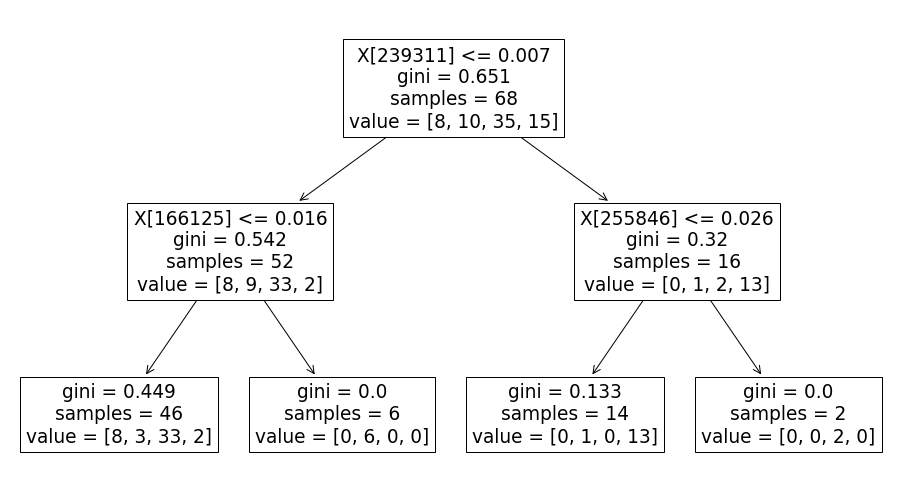

In [55]:
plt.figure(figsize=(16,9))
plot_tree(tree)
plt.show()

In [56]:
#decision tree scores
tree_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
tree_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Decision Tree!')
print('---------------------------')
print(f'Our baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {tree_precision}')
print(f'recall score is {tree_recall}')

Scores for Decision Tree!
---------------------------
Our baseline score is 0.53
accuracy score is 0.79
precision score is 0.66
recall score is 0.62


<br>

### Random Forest

In [57]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

rf = RandomForestClassifier(random_state=906, max_depth = 2).fit(X_train, y_train)

train['predicted'] = rf.predict(X_train)
test['predicted'] = rf.predict(X_test)

print(f'train score: {rf.score(X_train, y_train):.2%}')
print(f'validate score: {rf.score(X_validate, y_validate):.2%}')

train score: 51.47%
validate score: 52.94%


In [58]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 51.47%
---
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
JavaScript   8    10          35      15
---
              precision    recall  f1-score   support

          Go       0.00      0.00      0.00         8
        Java       0.00      0.00      0.00        10
  JavaScript       0.51      1.00      0.68        35
      Python       0.00      0.00      0.00        15

    accuracy                           0.51        68
   macro avg       0.13      0.25      0.17        68
weighted avg       0.26      0.51      0.35        68



In [59]:
#random forest scores
rf_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
rf_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Random Forest!')
print('---------------------------')
print(f'Our baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {rf_precision}')
print(f'recall score is {rf_recall}')

Scores for Random Forest!
---------------------------
Our baseline score is 0.53
accuracy score is 0.51
precision score is 0.13
recall score is 0.25


<br>

### Logistic Regression

In [60]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression(C=.6).fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

print(f'train score: {lm.score(X_train, y_train):.2%}')
print(f'validate score: {lm.score(X_validate, y_validate):.2%}')

train score: 52.94%
validate score: 52.94%


In [61]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 52.94%
---
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
JavaScript   8    10          35      14
Python       0     0           0       1
---
              precision    recall  f1-score   support

          Go       0.00      0.00      0.00         8
        Java       0.00      0.00      0.00        10
  JavaScript       0.52      1.00      0.69        35
      Python       1.00      0.07      0.12        15

    accuracy                           0.53        68
   macro avg       0.38      0.27      0.20        68
weighted avg       0.49      0.53      0.38        68



In [62]:
#logistic regression scores
logit_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
logit_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Logistic Regression!')
print('---------------------------')
print(f'Our baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {logit_precision}')
print(f'recall score is {logit_recall}')

Scores for Logistic Regression!
---------------------------
Our baseline score is 0.53
accuracy score is 0.53
precision score is 0.38
recall score is 0.27


<br>

### KNN

In [63]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

#use 9 for single
#10 for bigrams and trigrams
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

train['predicted'] = knn.predict(X_train)
test['predicted'] = knn.predict(X_test)

print(f'train score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')

train score: 86.76%
validate score: 82.35%


In [64]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 86.76%
---
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
Go           7     0           0       0
Java         0     6           1       1
JavaScript   1     3          33       1
Python       0     1           1      13
---
              precision    recall  f1-score   support

          Go       1.00      0.88      0.93         8
        Java       0.75      0.60      0.67        10
  JavaScript       0.87      0.94      0.90        35
      Python       0.87      0.87      0.87        15

    accuracy                           0.87        68
   macro avg       0.87      0.82      0.84        68
weighted avg       0.87      0.87      0.86        68



In [65]:
#knn scores
knn_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
knn_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for KNN!')
print('---------------------------')
print(f'Our baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {knn_precision}')
print(f'recall score is {knn_recall}')

Scores for KNN!
---------------------------
Our baseline score is 0.53
accuracy score is 0.87
precision score is 0.87
recall score is 0.82


<br>

### Naive Bayes

In [66]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

nb = MultinomialNB(alpha=1.4).fit(X_train, y_train)

train['predicted'] = nb.predict(X_train)
test['predicted'] = nb.predict(X_test)

print(f'train score: {nb.score(X_train, y_train):.2%}')
print(f'validate score: {nb.score(X_validate, y_validate):.2%}')

train score: 52.94%
validate score: 52.94%


In [67]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 52.94%
---
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
JavaScript   8    10          35      14
Python       0     0           0       1
---
              precision    recall  f1-score   support

          Go       0.00      0.00      0.00         8
        Java       0.00      0.00      0.00        10
  JavaScript       0.52      1.00      0.69        35
      Python       1.00      0.07      0.12        15

    accuracy                           0.53        68
   macro avg       0.38      0.27      0.20        68
weighted avg       0.49      0.53      0.38        68



In [68]:
#naive bayes scores
nb_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
nb_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Naive Bayes!')
print('---------------------------')
print(f'Our baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {nb_precision}')
print(f'recall score is {nb_recall}')

Scores for Naive Bayes!
---------------------------
Our baseline score is 0.53
accuracy score is 0.53
precision score is 0.38
recall score is 0.27


# Test

Our best performing model: KNN

In [69]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

#use 9 for single
#10 for bigrams and trigrams
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

train['predicted'] = knn.predict(X_train)
test['predicted'] = knn.predict(X_test)

print(f'train score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')

train score: 86.76%
validate score: 82.35%


In [74]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('------------------------------------------------------')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('------------------------------------------------------')
print(classification_report(test.actual, test.predicted))
print('------------------------------------------------------')
print(f'Our baseline score is {baseline_score*100}%')
print(f'training score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
print(f'test score: {knn.score(X_test, y_test):.2%}')

Accuracy: 81.82%
------------------------------------------------------
Confusion Matrix
actual      Go  Java  JavaScript  Python
predicted                               
Go           1     0           1       0
Java         0     3           0       0
JavaScript   2     0          10       1
Python       0     0           0       4
------------------------------------------------------
              precision    recall  f1-score   support

          Go       0.50      0.33      0.40         3
        Java       1.00      1.00      1.00         3
  JavaScript       0.77      0.91      0.83        11
      Python       1.00      0.80      0.89         5

    accuracy                           0.82        22
   macro avg       0.82      0.76      0.78        22
weighted avg       0.82      0.82      0.81        22

------------------------------------------------------
Our baseline score is 53.0%
training score: 86.76%
validate score: 82.35%
test score: 81.82%


In [76]:
knn_precision = round(sklearn.metrics.precision_score(y_test, test.predicted, average='macro'),2)
knn_recall = round(sklearn.metrics.recall_score(y_test, test.predicted, average='macro'),2)

print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_test, test.predicted),2)}')
print(f'precision score is {knn_precision}')
print(f'recall score is {knn_recall}')

accuracy score is 0.82
precision score is 0.82
recall score is 0.76


# Conclusion and Next Steps

 - Using a combination of single words, bigrams, and trigrams, our best performing model was a KNN. 
 - It beat the baseline by 28.82%. 
 - Accuracy of 82%, precision of 82%, and recall of 76%

With more time, we would like to use more repositories to potentially find more words that can help predict the programming language used. We'd also take more time to prepare our data to assure we are using meaningful readmes.